### Importing all the dependencies


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns


### Read the Flight dataset 


In [2]:
data=pd.read_csv(r"D:\dataset\2019.csv",usecols=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME','ARR_DELAY','DISTANCE', 'FL_DATE'])

In [3]:
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0
...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989.0
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399.0
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280.0
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_UNIQUE_CARRIER  object 
 2   ORIGIN             object 
 3   DEST               object 
 4   DEP_TIME           float64
 5   DEP_DELAY          float64
 6   ARR_TIME           float64
 7   ARR_DELAY          float64
 8   DISTANCE           float64
dtypes: float64(5), object(4)
memory usage: 509.6+ MB


In [5]:
data.describe()

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
count,7.291951e+06,7.291927e+06,7.284391e+06,7.268232e+06,7.422037e+06
mean,1.334606e+03,1.092327e+01,1.462955e+03,5.414849e+00,8.005437e+02
std,5.071998e+02,4.895964e+01,5.424542e+02,5.106666e+01,5.925118e+02
min,1.000000e+00,-8.200000e+01,1.000000e+00,-9.900000e+01,3.100000e+01
25%,9.140000e+02,-5.000000e+00,1.046000e+03,-1.500000e+01,3.690000e+02
50%,1.327000e+03,-2.000000e+00,1.504000e+03,-6.000000e+00,6.400000e+02
75%,1.746000e+03,7.000000e+00,1.917000e+03,7.000000e+00,1.034000e+03
max,2.400000e+03,2.710000e+03,2.400000e+03,2.695000e+03,5.095000e+03


In [6]:
data.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0


In [7]:
data.tail()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989.0
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399.0
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280.0
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674.0
7422036,2019-12-31,B6,SJU,BOS,431.0,2.0,722.0,-16.0,1674.0


In [8]:
data.shape

(7422037, 9)

In [9]:
data.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE'],
      dtype='object')

In [10]:
# pd.to_datetime is used to convert argument to datetime.
data['dt'] = pd.to_datetime(data['FL_DATE'])
data['WDAY'] = data['dt'].dt.dayofweek   
data['DAY'] = data['dt'].dt.day
data['MONTH'] = data['dt'].dt.month
data['YEAR'] = data['dt'].dt.year

In [11]:
data['dt'].dt.dayofweek

0          1
1          1
2          1
3          1
4          1
          ..
7422032    1
7422033    1
7422034    1
7422035    1
7422036    1
Name: dt, Length: 7422037, dtype: int64

In [12]:
data['dt'].dt.day

0           1
1           1
2           1
3           1
4           1
           ..
7422032    31
7422033    31
7422034    31
7422035    31
7422036    31
Name: dt, Length: 7422037, dtype: int64

In [13]:
data['dt'].dt.month

0           1
1           1
2           1
3           1
4           1
           ..
7422032    12
7422033    12
7422034    12
7422035    12
7422036    12
Name: dt, Length: 7422037, dtype: int64

In [14]:
data['dt'].dt.year

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
7422032    2019
7422033    2019
7422034    2019
7422035    2019
7422036    2019
Name: dt, Length: 7422037, dtype: int64

In [15]:
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989.0,2019-12-31,1,31,12,2019
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399.0,2019-12-31,1,31,12,2019
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280.0,2019-12-31,1,31,12,2019
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674.0,2019-12-31,1,31,12,2019


### Data Preprocessing with Data Visualization

In [16]:
#Checking for missing values/data 
data.isnull().sum()

FL_DATE                   0
OP_UNIQUE_CARRIER         0
ORIGIN                    0
DEST                      0
DEP_TIME             130086
DEP_DELAY            130110
ARR_TIME             137646
ARR_DELAY            153805
DISTANCE                  0
dt                        0
WDAY                      0
DAY                       0
MONTH                     0
YEAR                      0
dtype: int64

In [17]:
data['CARRIER_DELAY'] = data['ARR_DELAY'] * 0.2
data['WEATHER_DELAY'] = data['ARR_DELAY'] * 0.3
data['SECURITY_DELAY'] = data['DEP_DELAY'] * 0.1
data['LATE_AIRCRAFT_DELAY'] = data['DEP_DELAY'] * 0.4

In [18]:
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019,-0.2,-0.3,0.1,0.4
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019,-7.2,-10.8,-0.5,-2.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019,-3.2,-4.8,-0.5,-2.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019,-2.8,-4.2,-0.6,-2.4
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019,-5.0,-7.5,-1.5,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989.0,2019-12-31,1,31,12,2019,10.4,15.6,6.4,25.6
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399.0,2019-12-31,1,31,12,2019,-3.4,-5.1,-0.6,-2.4
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280.0,2019-12-31,1,31,12,2019,-6.8,-10.2,-0.8,-3.2
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674.0,2019-12-31,1,31,12,2019,-5.4,-8.1,-0.1,-0.4


In [19]:
a=data['DEP_DELAY'].max()
a

2710.0

In [20]:
b=data['ARR_DELAY'].max()
b

2695.0

In [21]:
c=data['ARR_DELAY'].max()
c

2695.0

In [22]:
#Identifying number of duplicate values
num_duplicates = data.duplicated().sum()

# Print the count of duplicate values
print("Number of duplicates:", num_duplicates)

Number of duplicates: 27633


In [23]:
data.drop_duplicates(inplace=True)


In [24]:
columns_to_drop = ['dt']
data = data.drop(columns_to_drop, axis=1)

In [25]:
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,1,1,2019,-0.2,-0.3,0.1,0.4
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,1,1,2019,-7.2,-10.8,-0.5,-2.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,1,1,2019,-3.2,-4.8,-0.5,-2.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,1,1,2019,-2.8,-4.2,-0.6,-2.4
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,1,1,2019,-5.0,-7.5,-1.5,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989.0,1,31,12,2019,10.4,15.6,6.4,25.6
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399.0,1,31,12,2019,-3.4,-5.1,-0.6,-2.4
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280.0,1,31,12,2019,-6.8,-10.2,-0.8,-3.2
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674.0,1,31,12,2019,-5.4,-8.1,-0.1,-0.4


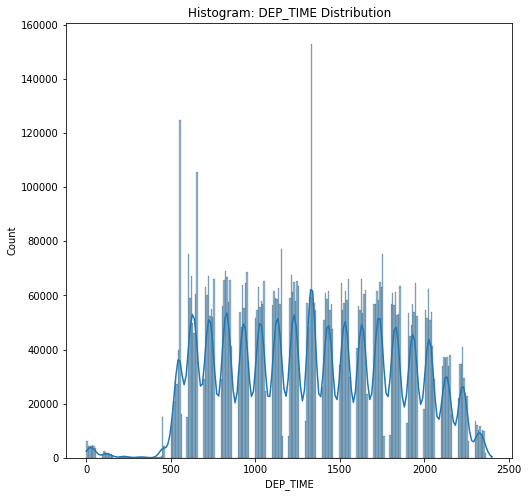

In [27]:
# Assuming 'data' is your DataFrame containing the 'DEP_TIME' column
fig, ax = plt.subplots(figsize=(8, 8))

# Use the 'histplot' function to draw the histogram
sns.histplot(data['DEP_TIME'], kde=True, ax=ax)

ax.set_xlabel('DEP_TIME')
plt.title('Histogram: DEP_TIME Distribution')
plt.show()

In [26]:
#Replace the missing values with the Mean value
#We can replce the values by either mean or median because Skewness is close to 0
data['DEP_TIME'].fillna(data['DEP_TIME'].mean() ,inplace=True)

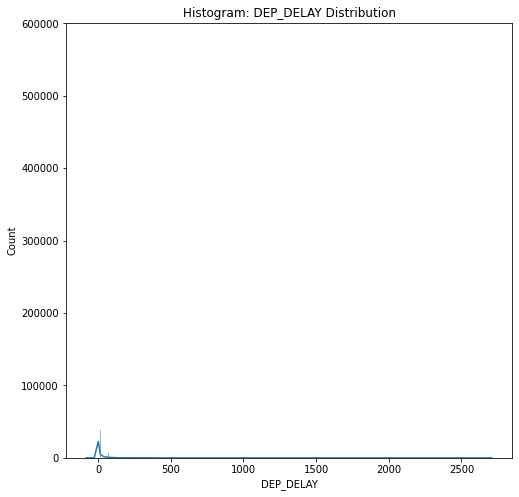

In [29]:
# Assuming 'data' is your DataFrame containing the 'DEP_TIME' column
fig, ax = plt.subplots(figsize=(8, 8))

# Use the 'histplot' function to draw the histogram
sns.histplot(data['DEP_DELAY'], kde=True, ax=ax)

ax.set_xlabel('DEP_DELAY')
plt.title('Histogram: DEP_DELAY Distribution')
plt.show()

In [27]:
#Replace the missing values with the Mean value
data['DEP_DELAY'].fillna(data['DEP_DELAY'].mean() ,inplace=True)

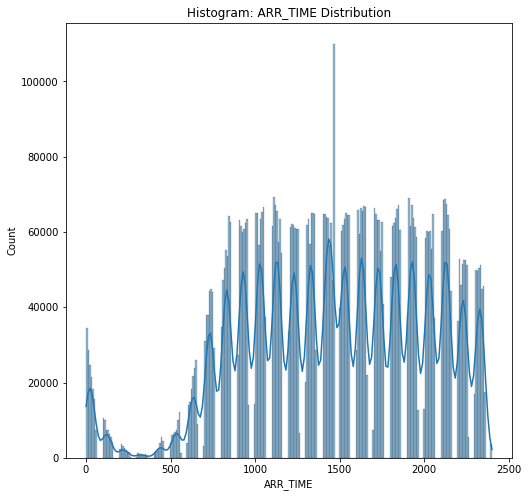

In [33]:
# Assuming 'data' is your DataFrame containing the 'DEP_TIME' column
fig, ax = plt.subplots(figsize=(8, 8))

# Use the 'histplot' function to draw the histogram
sns.histplot(data['ARR_TIME'], kde=True, ax=ax)

ax.set_xlabel('ARR_TIME')
plt.title('Histogram: ARR_TIME Distribution')
plt.show()

In [28]:
#Replace the missing values with the Mean value
data['ARR_TIME'].fillna(data['ARR_TIME'].mean() ,inplace=True)

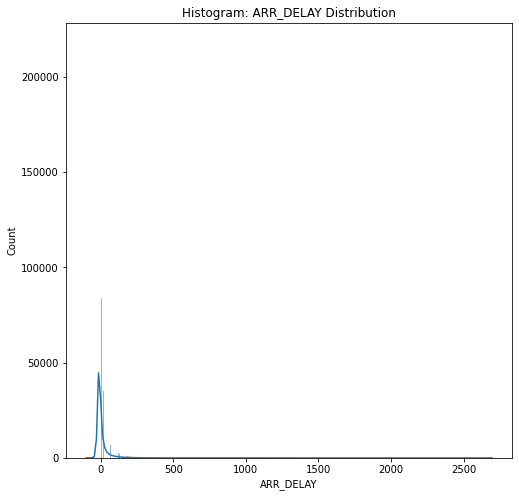

In [31]:
# Assuming 'data' is your DataFrame containing the 'DEP_TIME' column
fig, ax = plt.subplots(figsize=(8, 8))

# Use the 'histplot' function to draw the histogram
sns.histplot(data['ARR_DELAY'], kde=True, ax=ax)

ax.set_xlabel('ARR_DELAY')
plt.title('Histogram: ARR_DELAY Distribution')
plt.show()

In [29]:
#Replace the missing values with the Mean value
data['ARR_DELAY'].fillna(data['ARR_DELAY'].mean() ,inplace=True)

In [30]:
data.isnull().sum()

FL_DATE                     0
OP_UNIQUE_CARRIER           0
ORIGIN                      0
DEST                        0
DEP_TIME                    0
DEP_DELAY                   0
ARR_TIME                    0
ARR_DELAY                   0
DISTANCE                    0
WDAY                        0
DAY                         0
MONTH                       0
YEAR                        0
CARRIER_DELAY          126172
WEATHER_DELAY          126172
SECURITY_DELAY         102477
LATE_AIRCRAFT_DELAY    102477
dtype: int64

In [31]:
data['CARRIER_DELAY'].fillna(data['CARRIER_DELAY'].mean() ,inplace=True)
data['WEATHER_DELAY'].fillna(data['WEATHER_DELAY'].mean() ,inplace=True)
data['SECURITY_DELAY'].fillna(data['SECURITY_DELAY'].mean() ,inplace=True)
data['LATE_AIRCRAFT_DELAY'].fillna(data['LATE_AIRCRAFT_DELAY'].mean() ,inplace=True)


In [32]:
data.isnull().sum()

FL_DATE                0
OP_UNIQUE_CARRIER      0
ORIGIN                 0
DEST                   0
DEP_TIME               0
DEP_DELAY              0
ARR_TIME               0
ARR_DELAY              0
DISTANCE               0
WDAY                   0
DAY                    0
MONTH                  0
YEAR                   0
CARRIER_DELAY          0
WEATHER_DELAY          0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

### Loading carriers dataset

In [36]:
carriers=pd.read_csv(r"D:\dataset\L_UNIQUE_CARRIERS.csv",names=['OP_UNIQUE_CARRIER', 'Carrier'])

In [37]:
carriers.head()

,OP_UNIQUE_CARRIER,Carrier
0,Code,Description
1,02Q,Titan Airways
2,04Q,Tradewind Aviation
3,05Q,"Comlux Aviation, AG"
4,06Q,Master Top Linhas Aereas Ltd.


In [39]:
carriers.tail()

,OP_UNIQUE_CARRIER,Carrier
1672,ZW,Air Wisconsin Airlines Corp
1673,ZX,Air Georgian
1674,ZX (1),Airbc Ltd.
1675,ZY,Atlantic Gulf Airlines
1676,ZYZ,Skyway Aviation Inc.


In [40]:
#Merging data and carriers on the common attribute name 'OP_UNIQUE_CARRIER'
data = pd.merge(data, carriers, how='left', on='OP_UNIQUE_CARRIER',  sort=True)
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,1,1,2019,-0.2,-0.3,0.1,0.4,Endeavor Air Inc.
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,1,1,2019,-7.2,-10.8,-0.5,-2.0,Endeavor Air Inc.
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,1,1,2019,-3.2,-4.8,-0.5,-2.0,Endeavor Air Inc.
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,1,1,2019,-2.8,-4.2,-0.6,-2.4,Endeavor Air Inc.
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,1,1,2019,-5.0,-7.5,-1.5,-6.0,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473.0,1,31,12,2019,-1.6,-2.4,-0.3,-1.2,Republic Airline
7394400,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931.0,1,31,12,2019,-0.6,-0.9,0.0,0.0,Republic Airline
7394401,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237.0,1,31,12,2019,-2.6,-3.9,-0.5,-2.0,Republic Airline
7394402,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226.0,1,31,12,2019,6.2,9.3,-0.3,-1.2,Republic Airline


In [41]:
data['FINAL_DELAY'] = data['DEP_DELAY'] +  data['ARR_DELAY']
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,1,1,2019,-0.2,-0.3,0.1,0.4,Endeavor Air Inc.,0.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,1,1,2019,-7.2,-10.8,-0.5,-2.0,Endeavor Air Inc.,-41.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,1,1,2019,-3.2,-4.8,-0.5,-2.0,Endeavor Air Inc.,-21.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,1,1,2019,-2.8,-4.2,-0.6,-2.4,Endeavor Air Inc.,-20.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,1,1,2019,-5.0,-7.5,-1.5,-6.0,Endeavor Air Inc.,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473.0,1,31,12,2019,-1.6,-2.4,-0.3,-1.2,Republic Airline,-11.0
7394400,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931.0,1,31,12,2019,-0.6,-0.9,0.0,0.0,Republic Airline,-3.0
7394401,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237.0,1,31,12,2019,-2.6,-3.9,-0.5,-2.0,Republic Airline,-18.0
7394402,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226.0,1,31,12,2019,6.2,9.3,-0.3,-1.2,Republic Airline,28.0


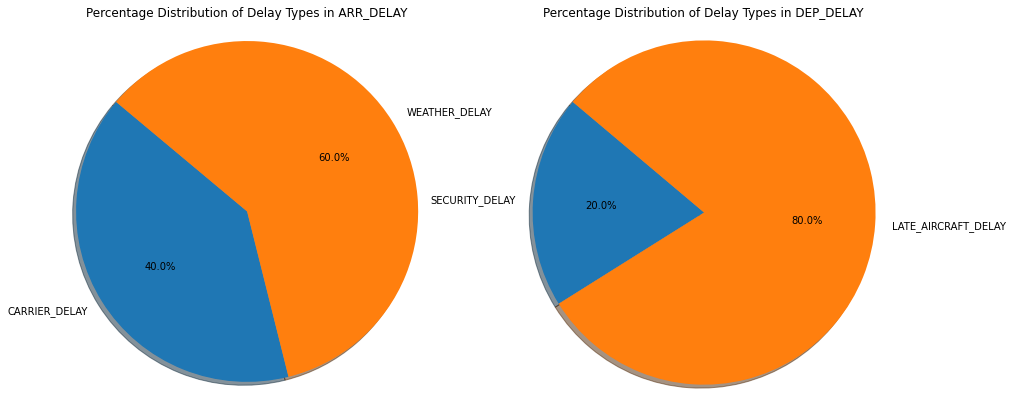

In [42]:
#Pie Chart to Visualize the percentage of delay in ARR_DELAY and DEP_DELAY

# Calculate total delay times for CARRIER_DELAY and WEATHER_DELAY (using ARR_DELAY)
total_carrier_delay = data['ARR_DELAY'] * 0.2
total_weather_delay = data['ARR_DELAY'] * 0.3

# Calculate total delay times for SECURITY_DELAY and LATE_AIRCRAFT_DELAY (using DEP_DELAY)
total_security_delay = data['DEP_DELAY'] * 0.1
total_late_aircraft_delay = data['DEP_DELAY'] * 0.4

# Data for the pie charts
labels_arr_delay = ['CARRIER_DELAY', 'WEATHER_DELAY']
sizes_arr_delay = [total_carrier_delay.sum(), total_weather_delay.sum()]

labels_dep_delay = ['SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
sizes_dep_delay = [total_security_delay.sum(), total_late_aircraft_delay.sum()]

# Create two subplots for ARR_DELAY and DEP_DELAY pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Create ARR_DELAY pie chart
ax1.pie(sizes_arr_delay, labels=labels_arr_delay, autopct='%1.1f%%', startangle=140, shadow=True)
ax1.axis('equal')
ax1.set_title('Percentage Distribution of Delay Types in ARR_DELAY')

# Create DEP_DELAY pie chart
ax2.pie(sizes_dep_delay, labels=labels_dep_delay, autopct='%1.1f%%', startangle=140, shadow=True)
ax2.axis('equal')
ax2.set_title('Percentage Distribution of Delay Types in DEP_DELAY')

# Show the pie charts
plt.show()


In [43]:
limits = [x * 100 for x in range(0,25)]
names = [x * 100 for x in range(0,24)]
data['HOUR'] = pd.cut(data['DEP_TIME'], limits, labels=names, right=True)
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY,HOUR
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,1,1,2019,-0.2,-0.3,0.1,0.4,Endeavor Air Inc.,0.0,600
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,1,1,2019,-7.2,-10.8,-0.5,-2.0,Endeavor Air Inc.,-41.0,1300
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,1,1,2019,-3.2,-4.8,-0.5,-2.0,Endeavor Air Inc.,-21.0,1200
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,1,1,2019,-2.8,-4.2,-0.6,-2.4,Endeavor Air Inc.,-20.0,1500
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,1,1,2019,-5.0,-7.5,-1.5,-6.0,Endeavor Air Inc.,-40.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473.0,1,31,12,2019,-1.6,-2.4,-0.3,-1.2,Republic Airline,-11.0,1000
7394400,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931.0,1,31,12,2019,-0.6,-0.9,0.0,0.0,Republic Airline,-3.0,1300
7394401,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237.0,1,31,12,2019,-2.6,-3.9,-0.5,-2.0,Republic Airline,-18.0,600
7394402,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226.0,1,31,12,2019,6.2,9.3,-0.3,-1.2,Republic Airline,28.0,500


In [44]:
ans=data['DISTANCE'].max()
ans

5095.0

In [45]:
distance_limits = [x * 100 for x in range(0,52)]
distance_labels = [x * 100 for x in range(0,51)]
data['DISTANCE_INTERVALS'] = pd.cut(data['DISTANCE'], 
                                    distance_limits, labels=distance_labels,
                                    right=False)
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,...,MONTH,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY,HOUR,DISTANCE_INTERVALS
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,...,1,2019,-0.2,-0.3,0.1,0.4,Endeavor Air Inc.,0.0,600,300
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,...,1,2019,-7.2,-10.8,-0.5,-2.0,Endeavor Air Inc.,-41.0,1300,500
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,...,1,2019,-3.2,-4.8,-0.5,-2.0,Endeavor Air Inc.,-21.0,1200,200
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,...,1,2019,-2.8,-4.2,-0.6,-2.4,Endeavor Air Inc.,-20.0,1500,200
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,...,1,2019,-5.0,-7.5,-1.5,-6.0,Endeavor Air Inc.,-40.0,1800,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473.0,1,...,12,2019,-1.6,-2.4,-0.3,-1.2,Republic Airline,-11.0,1000,400
7394400,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931.0,1,...,12,2019,-0.6,-0.9,0.0,0.0,Republic Airline,-3.0,1300,900
7394401,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237.0,1,...,12,2019,-2.6,-3.9,-0.5,-2.0,Republic Airline,-18.0,600,200
7394402,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226.0,1,...,12,2019,6.2,9.3,-0.3,-1.2,Republic Airline,28.0,500,200


In [46]:
data['GAIN'] = data['DEP_DELAY'] - data['ARR_DELAY']
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,...,YEAR,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY,HOUR,DISTANCE_INTERVALS,GAIN
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,...,2019,-0.2,-0.3,0.1,0.4,Endeavor Air Inc.,0.0,600,300,2.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,...,2019,-7.2,-10.8,-0.5,-2.0,Endeavor Air Inc.,-41.0,1300,500,31.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,...,2019,-3.2,-4.8,-0.5,-2.0,Endeavor Air Inc.,-21.0,1200,200,11.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,...,2019,-2.8,-4.2,-0.6,-2.4,Endeavor Air Inc.,-20.0,1500,200,8.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,...,2019,-5.0,-7.5,-1.5,-6.0,Endeavor Air Inc.,-40.0,1800,500,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473.0,1,...,2019,-1.6,-2.4,-0.3,-1.2,Republic Airline,-11.0,1000,400,5.0
7394400,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931.0,1,...,2019,-0.6,-0.9,0.0,0.0,Republic Airline,-3.0,1300,900,3.0
7394401,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237.0,1,...,2019,-2.6,-3.9,-0.5,-2.0,Republic Airline,-18.0,600,200,8.0
7394402,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226.0,1,...,2019,6.2,9.3,-0.3,-1.2,Republic Airline,28.0,500,200,-34.0


In [47]:
only_airlines = data['Carrier'].unique()
print("Airlines:")
print(only_airlines)

Airlines:
['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'ExpressJet Airlines LLC'
 'Frontier Airlines Inc.' 'Allegiant Air' 'Hawaiian Airlines Inc.'
 'Envoy Air' 'Spirit Air Lines' 'PSA Airlines Inc.'
 'SkyWest Airlines Inc.' 'United Air Lines Inc.' 'Southwest Airlines Co.'
 'Mesa Airlines Inc.' 'Republic Airline']


In [48]:
#Calculate the average delay time per airline
av_delay = pd.DataFrame(data.groupby('Carrier')['FINAL_DELAY'].mean(), columns=['FINAL_DELAY'], index=only_airlines)
av_delay = av_delay.rename(columns={'FINAL_DELAY': 'Average delay'})
print("\nAverage delay time per airline:")
av_delay


Average delay time per airline:


,Average delay
Endeavor Air Inc.,13.353959
American Airlines Inc.,19.033850
Alaska Airlines Inc.,6.492922
JetBlue Airways,28.830474
Delta Air Lines Inc.,9.359483
ExpressJet Airlines LLC,32.043450
Frontier Airlines Inc.,23.176391
Allegiant Air,18.112338
Hawaiian Airlines Inc.,1.965337
Envoy Air,16.153368


<BarContainer object of 17 artists>

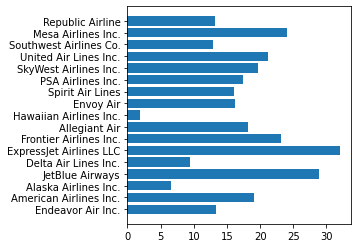

In [49]:
#Horizontal bar plot between only_airlines and Average delay
plt.figure(figsize=(4,4))
plt.barh(only_airlines,av_delay['Average delay'] )


In [50]:
#get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY']
air_orig_dest = data[cols]

#set origin and destination and filter
orig = 'ABQ'
dest = 'ORD'
my_orig_dest = air_orig_dest[(air_orig_dest['ORIGIN'] == orig) & (air_orig_dest['DEST'] == dest)]

#compute the average delay on flights from ABQ to ORD
my_orig_dest = my_orig_dest['FINAL_DELAY'].groupby([ data['ORIGIN'], data['DEST'],data['Carrier']]).mean()


print('Final delay time for each carrier:')
my_orig_dest

Final delay time for each carrier:


ORIGIN  DEST  Carrier                
ABQ     ORD   American Airlines Inc.     23.916433
              Envoy Air                  35.388634
              ExpressJet Airlines LLC    41.928571
              Republic Airline            4.732132
              SkyWest Airlines Inc.      40.350334
              United Air Lines Inc.      39.382044
Name: FINAL_DELAY, dtype: float64

In [51]:
#set intervals
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']
data['INTERVAL'] = pd.cut(data['DEP_TIME'], limits, labels=names, right=True)
data

#get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL']
my_orig_dest = data[cols]

#set origin and destination and filter
my_orig_dest = my_orig_dest[(my_orig_dest['ORIGIN'] == orig) & (my_orig_dest['DEST'] == dest)]

by_interval = my_orig_dest['FINAL_DELAY'].groupby([my_orig_dest['ORIGIN'], my_orig_dest['DEST'], my_orig_dest['Carrier'], my_orig_dest['INTERVAL']]).mean()
by_interval = pd.DataFrame(by_interval)
print('Final delay time for each carrier grouped by period of the day:')
by_interval


Final delay time for each carrier grouped by period of the day:


FINAL_DELAY
ORIGIN DEST Carrier                 INTERVAL                  
ABQ    ORD  American Airlines Inc.  early morning   -23.636364
                                    morning          23.770439
                                    afternoon        28.485263
                                    night           583.000000
            Envoy Air               early morning          NaN
                                    morning          44.044349
                                    afternoon        29.880451
                                    night                  NaN
            ExpressJet Airlines LLC early morning          NaN
                                    morning          -1.750000
                                    afternoon       304.000000
                                    night                  NaN
            Republic Airline        early morning   -35.000000
                                    morning          -0.111111
                                    afternoon         5.591115
                                    night                  NaN
            SkyWest Airlines Inc.   early morning   -21.846154
                                    morning          39.250000
                                    afternoon        65.096684
                                    night           929.000000
            United Air Lines Inc.   early morning    -3.000000
                                    morning          17.257143
                                    afternoon        22.123946
                                    night           915.666667

In [52]:
data.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'WDAY', 'DAY',
       'MONTH', 'YEAR', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Carrier', 'FINAL_DELAY', 'HOUR',
       'DISTANCE_INTERVALS', 'GAIN', 'INTERVAL'],
      dtype='object')

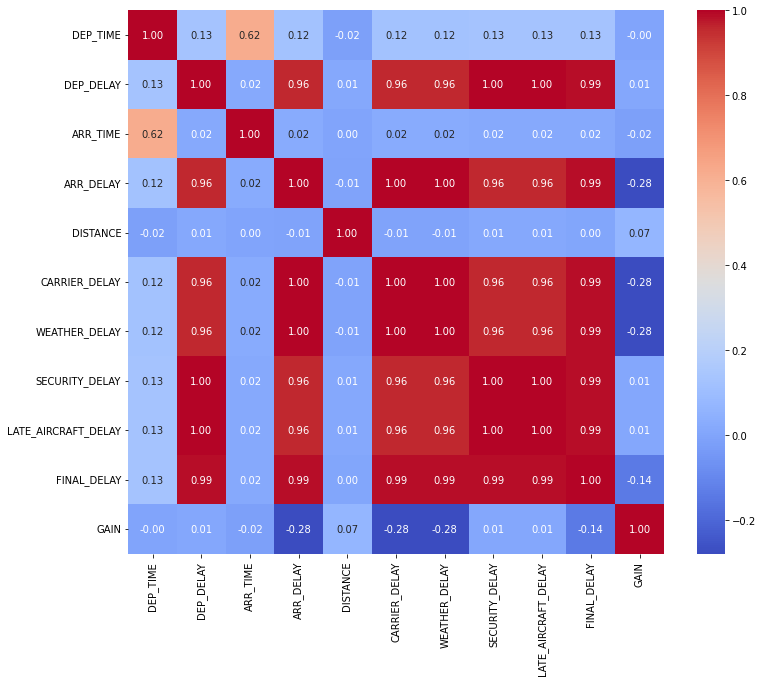

In [53]:
# Assuming 'data' is your DataFrame containing the columns mentioned in your index
numeric_columns = ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY',
                   'LATE_AIRCRAFT_DELAY', 'FINAL_DELAY', 'HOUR', 'DISTANCE_INTERVALS', 'GAIN']

# Extract the subset of the DataFrame containing only the numeric columns
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Draw the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

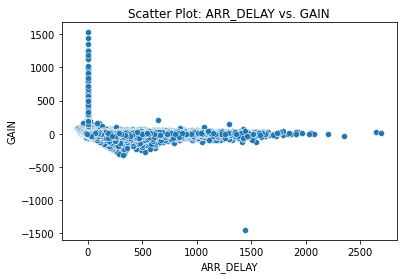

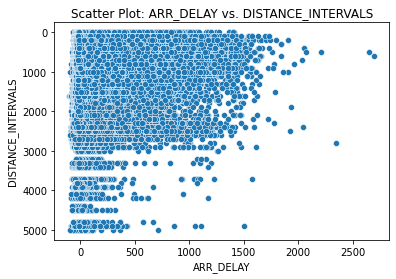

In [54]:
sns.scatterplot(data=data, x='ARR_DELAY', y='GAIN')
plt.title('Scatter Plot: ARR_DELAY vs. GAIN')
plt.xlabel('ARR_DELAY')
plt.ylabel('GAIN')
plt.show()

# Scatter plot for ARR_DELAY vs. DISTANCE_INTERVALS
sns.scatterplot(data=data, x='ARR_DELAY', y='DISTANCE_INTERVALS')
plt.title('Scatter Plot: ARR_DELAY vs. DISTANCE_INTERVALS')
plt.xlabel('ARR_DELAY')
plt.ylabel('DISTANCE_INTERVALS')
plt.show()

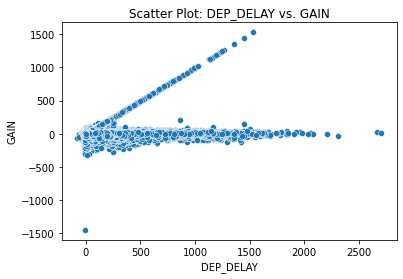

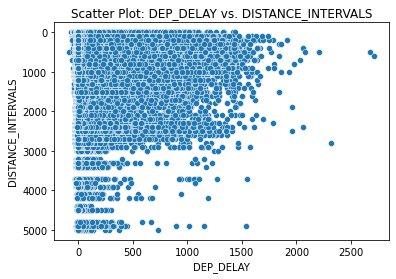

In [102]:
sns.scatterplot(data=data, x='DEP_DELAY', y='GAIN')
plt.title('Scatter Plot: DEP_DELAY vs. GAIN')
plt.xlabel('DEP_DELAY')
plt.ylabel('GAIN')
plt.show()

# Scatter plot for ARR_DELAY vs. DISTANCE_INTERVALS
sns.scatterplot(data=data, x='DEP_DELAY', y='DISTANCE_INTERVALS')
plt.title('Scatter Plot: DEP_DELAY vs. DISTANCE_INTERVALS')
plt.xlabel('DEP_DELAY')
plt.ylabel('DISTANCE_INTERVALS')
plt.show()

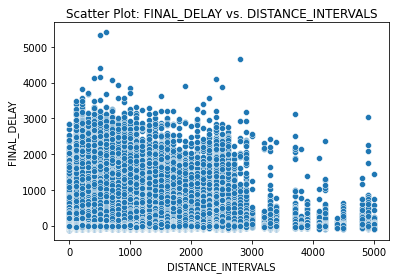

In [114]:
# Scatter plot for ARR_DELAY vs. DISTANCE_INTERVALS
sns.scatterplot(data=data, y='FINAL_DELAY', x='DISTANCE_INTERVALS')
plt.title('Scatter Plot: FINAL_DELAY vs. DISTANCE_INTERVALS')
plt.ylabel('FINAL_DELAY')
plt.xlabel('DISTANCE_INTERVALS')
plt.show()

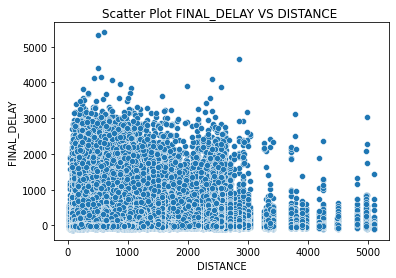

In [46]:
# Plot the scatter plot
sns.scatterplot(data=data, y='FINAL_DELAY', x='DISTANCE')


plt.title('Scatter Plot FINAL_DELAY VS DISTANCE ')
plt.ylabel('FINAL_DELAY')
plt.xlabel('DISTANCE')
plt.show()

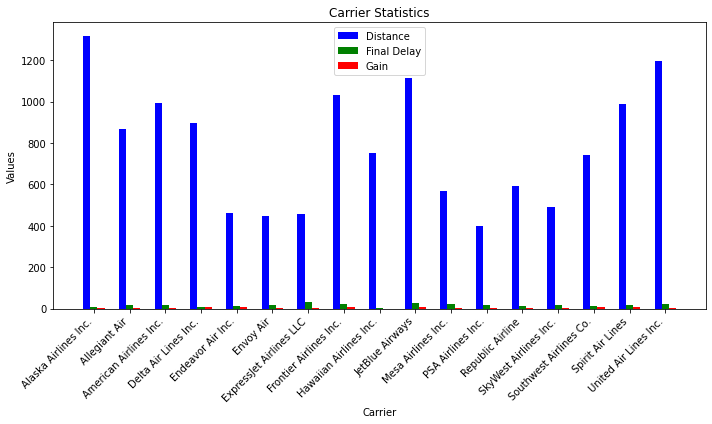

In [65]:
dataa = data[['Carrier', 'DISTANCE', 'FINAL_DELAY', 'GAIN']]

# Group the data by carrier and calculate the mean for each feature
grouped_df = dataa.groupby('Carrier').mean().reset_index()

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(grouped_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bars
ax.bar(r1, grouped_df['DISTANCE'], color='b', width=bar_width, label='Distance')
ax.bar(r2, grouped_df['FINAL_DELAY'], color='g', width=bar_width, label='Final Delay')
ax.bar(r3, grouped_df['GAIN'], color='r', width=bar_width, label='Gain')

# Add labels, title, and ticks
ax.set_xlabel('Carrier')
ax.set_ylabel('Values')
ax.set_title('Carrier Statistics')
ax.set_xticks([r + bar_width for r in range(len(grouped_df))])
ax.set_xticklabels(grouped_df['Carrier'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Loading the Model and Prediction

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error



In [50]:
data.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'WDAY', 'DAY',
       'MONTH', 'YEAR', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Carrier', 'FINAL_DELAY', 'HOUR',
       'DISTANCE_INTERVALS', 'GAIN', 'INTERVAL'],
      dtype='object')

In [51]:
data1=data

In [52]:
x = data1.drop(['ARR_DELAY','FL_DATE','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'
               ,'FINAL_DELAY','GAIN'],axis=1)
y = data1['ARR_DELAY']

In [53]:
# Transform categorical variables into numerical representations. 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ORIGIN', 'DEST', 'Carrier','OP_UNIQUE_CARRIER','INTERVAL']
label_encoder = LabelEncoder()
for col in categorical_cols:
    x[col] = label_encoder.fit_transform(x[col])


In [54]:
x

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
0,0,134,21,601.0,1.0,722.0,300.0,1,1,1,2019,4,600,300,2
1,0,233,85,1359.0,-5.0,1633.0,596.0,1,1,1,2019,4,1300,500,0
2,0,101,85,1215.0,-5.0,1329.0,229.0,1,1,1,2019,4,1200,200,0
3,0,337,21,1521.0,-6.0,1625.0,223.0,1,1,1,2019,4,1500,200,0
4,0,21,126,1847.0,-15.0,1940.0,579.0,1,1,1,2019,4,1800,500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,16,261,237,1037.0,-3.0,1219.0,473.0,1,31,12,2019,12,1000,400,2
7394400,16,92,233,1359.0,0.0,1552.0,931.0,1,31,12,2019,12,1300,900,0
7394401,16,279,261,655.0,-5.0,819.0,237.0,1,31,12,2019,12,600,200,2
7394402,16,21,73,512.0,-3.0,702.0,226.0,1,31,12,2019,12,500,200,1


In [55]:
x.columns

Index(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY',
       'ARR_TIME', 'DISTANCE', 'WDAY', 'DAY', 'MONTH', 'YEAR', 'Carrier',
       'HOUR', 'DISTANCE_INTERVALS', 'INTERVAL'],
      dtype='object')

In [56]:
y

0          -1.0
1         -36.0
2         -16.0
3         -14.0
4         -25.0
           ... 
7394399    -8.0
7394400    -3.0
7394401   -13.0
7394402    31.0
7394403    -5.0
Name: ARR_DELAY, Length: 7394404, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, 
                                                    random_state=2)


In [58]:
print(x.shape,x_train.shape,x_test.shape)

(7394404, 15) (5915523, 15) (1478881, 15)


In [59]:
print(y.shape,y_train.shape,y_test.shape)

(7394404,) (5915523,) (1478881,)


In [60]:
model = LinearRegression()


In [61]:
model.fit(x_train, y_train)

LinearRegression()

###  Prediction on Training data


In [62]:
train_data_prediction = model.predict(x_train)
train_data_prediction

array([ 22.58711545, -10.20632346, -12.93553057, ...,  13.92847145,
       -12.16112995,  -6.21172174])

In [63]:
# R squared Error and Mean Absolute Error
train_data_prediction = train_data_prediction[:len(y_train)]

score1 = metrics.r2_score(y_train, train_data_prediction)
score2=metrics.mean_absolute_error(y_train, train_data_prediction)
print("R squared Error : ", score1)
print("Mean Absolute Error : ", score2)

R squared Error :  0.9193243242397323
Mean Absolute Error :  9.451597910932081


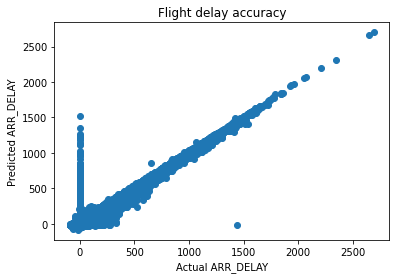

In [64]:
# Visualization of Actual ARR_DELAY and Predicted ARR_DELAY on training data
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual ARR_DELAY")
plt.ylabel("Predicted ARR_DELAY")
plt.title("Flight delay accuracy")
plt.show()

###  Prediction on Test data


In [65]:
# prediction on Test data
test_data_prediction = model.predict(x_test)
test_data_prediction

array([146.67540589, 233.37829694, -21.78312298, ...,  -9.37648653,
         8.74925869,  -8.88184615])

In [66]:
# R squared Error and Mean Absolute Error 

score1 = metrics.r2_score(y_test, test_data_prediction)
score2=metrics.mean_absolute_error(y_test, test_data_prediction)
print("R squared Error : ", score1)
print("Mean Absolute Error : ", score2)

R squared Error :  0.9198003924710733
Mean Absolute Error :  9.455879414569587


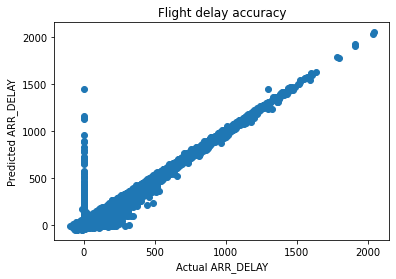

In [67]:
# Visualization of Actual ARR_DELAY and Predicted ARR_DELAY on testing data

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual ARR_DELAY")
plt.ylabel("Predicted ARR_DELAY")
plt.title("Flight delay accuracy")
plt.show()

In [68]:
#Correlation between DEP_DELAY and ARR_DELAY
correlation = data['DEP_DELAY'].corr(data['ARR_DELAY'])

print("Correlation between DEP_DELAY and ARR_DELAY:", correlation)


Correlation between DEP_DELAY and ARR_DELAY: 0.9585453787213546


In [69]:
#Correlation between DISTANCE and ARR_DELAY
correlation = data['ARR_DELAY'].corr(data['GAIN'])

print("Correlation between DISTANCE_INTERVAL and ARR_DELAY:", correlation)


Correlation between DISTANCE_INTERVAL and ARR_DELAY: -0.27902731947362513


### Building a Predictive System

In [81]:
inp_data=(16,220,58,2151.0,-4.0,38.0,946.0,1,31,12,2019,12,2100,900,3)
#Changing input data to numpy array
inp_data_as_numpy_array=np.asarray(inp_data)

# reshape the array
inp_data_reshaped=inp_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(inp_data_reshaped)

print(prediction)

print("ARR_DELAY is ", prediction[0])

if(prediction<0):
     print("Flight reached", prediction, "minutes Before Arrival time")

elif(prediction==0):
    print("Flight reached on Arrival time")

else:
     prediction = abs(prediction)
     print("Flight reached", prediction, "minutes After Arrival time")


[-11.20606903]
ARR_DELAY is  -11.206069029960897
Flight reached [-11.20606903] minutes Before Arrival time


C:\python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
inp_data

(16, 220, 58, 2151.0, -4.0, 38.0, 946.0, 1, 31, 12, 2019, 12, 2100, 900, 3)

In [109]:
inp_data_as_numpy_array

array([ 1.600e+01,  2.200e+02,  5.800e+01,  2.151e+03, -4.000e+00,
        3.800e+01,  9.460e+02,  1.000e+00,  3.100e+01,  1.200e+01,
        2.019e+03,  1.200e+01,  2.100e+03,  9.000e+02,  3.000e+00])

In [110]:
inp_data_reshaped

array([[ 1.600e+01,  2.200e+02,  5.800e+01,  2.151e+03, -4.000e+00,
         3.800e+01,  9.460e+02,  1.000e+00,  3.100e+01,  1.200e+01,
         2.019e+03,  1.200e+01,  2.100e+03,  9.000e+02,  3.000e+00]])

In [111]:
prediction

array([-11.20606903])

### The Decision Tree Regressor

In [ ]:
"""The Decision Tree Regressor is a non-linear regression algorithm that uses a tree-like structure to make predictions. 
It divides the feature space into segments based on the values of input features, creating decision nodes that branch out to different outcomes. 
Each leaf node represents a prediction value. During training, the algorithm recursively chooses the best feature to split the data and minimizes 
the variance of the target variable within each segment. 
This process results in a predictive model that can handle non-linear relationships between features 
and target variables. Decision Trees are interpretable, easy to implement, but may suffer from overfitting on complex datasets."""

In [70]:
data2=data

In [71]:
import pandas as pd

# Define the bins and labels for each category
bins = [-float('inf'), 0, 15, 30, float('inf')]
labels = ['On time', 'Slightly delayed', 'Moderately delayed', 'Highly delayed']

# Create the target variable with categories
data2['Delay_Category'] = pd.cut(data2['ARR_DELAY'], bins=bins, labels=labels)

# Convert categories into binary labels
data2['Delay_Label'] = data2['Delay_Category'].map({'On time': 0, 'Slightly delayed': 1, 'Moderately delayed': 1, 'Highly delayed': 1})


In [72]:
X1 = data2.drop(['ARR_DELAY', 'Delay_Category', 'Delay_Label','ARR_DELAY','FL_DATE','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'
               ,'FINAL_DELAY','GAIN'], axis=1)
Y1 = data2['Delay_Label']


In [73]:
X1

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
0,9E,GNV,ATL,601.0,1.0,722.0,300.0,1,1,1,2019,Endeavor Air Inc.,600,300,morning
1,9E,MSP,CVG,1359.0,-5.0,1633.0,596.0,1,1,1,2019,Endeavor Air Inc.,1300,500,afternoon
2,9E,DTW,CVG,1215.0,-5.0,1329.0,229.0,1,1,1,2019,Endeavor Air Inc.,1200,200,afternoon
3,9E,TLH,ATL,1521.0,-6.0,1625.0,223.0,1,1,1,2019,Endeavor Air Inc.,1500,200,afternoon
4,9E,ATL,FSM,1847.0,-15.0,1940.0,579.0,1,1,1,2019,Endeavor Air Inc.,1800,500,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,YX,PHL,MYR,1037.0,-3.0,1219.0,473.0,1,31,12,2019,Republic Airline,1000,400,morning
7394400,YX,DCA,MSP,1359.0,0.0,1552.0,931.0,1,31,12,2019,Republic Airline,1300,900,afternoon
7394401,YX,PVD,PHL,655.0,-5.0,819.0,237.0,1,31,12,2019,Republic Airline,600,200,morning
7394402,YX,ATL,CLT,512.0,-3.0,702.0,226.0,1,31,12,2019,Republic Airline,500,200,early morning


In [74]:
# Transform categorical variables into numerical representations. 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ORIGIN', 'DEST', 'Carrier','OP_UNIQUE_CARRIER','INTERVAL']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X1[col] = label_encoder.fit_transform(X1[col])


In [75]:
X1

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
0,0,134,21,601.0,1.0,722.0,300.0,1,1,1,2019,4,600,300,2
1,0,233,85,1359.0,-5.0,1633.0,596.0,1,1,1,2019,4,1300,500,0
2,0,101,85,1215.0,-5.0,1329.0,229.0,1,1,1,2019,4,1200,200,0
3,0,337,21,1521.0,-6.0,1625.0,223.0,1,1,1,2019,4,1500,200,0
4,0,21,126,1847.0,-15.0,1940.0,579.0,1,1,1,2019,4,1800,500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394399,16,261,237,1037.0,-3.0,1219.0,473.0,1,31,12,2019,12,1000,400,2
7394400,16,92,233,1359.0,0.0,1552.0,931.0,1,31,12,2019,12,1300,900,0
7394401,16,279,261,655.0,-5.0,819.0,237.0,1,31,12,2019,12,600,200,2
7394402,16,21,73,512.0,-3.0,702.0,226.0,1,31,12,2019,12,500,200,1


In [76]:
Y1

0          0
1          0
2          0
3          0
4          0
          ..
7394399    0
7394400    0
7394401    0
7394402    1
7394403    0
Name: Delay_Label, Length: 7394404, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.838175620621267


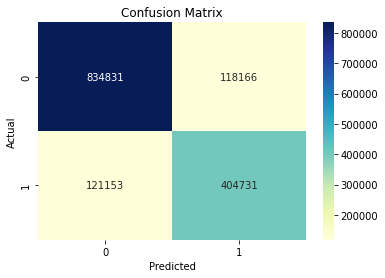

In [100]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
"""
                    Predicted Negative    Predicted Positive
Actual Negative    True Negative (TN)    False Positive (FP)
Actual Positive    False Negative (FN)   True Positive (TP)

"""
"""
True Positive (TP): The number of instances that are correctly predicted as positive (e.g., "Slightly delayed," "Moderately delayed," or "Highly delayed").
True Negative (TN): The number of instances that are correctly predicted as negative (e.g., "On time").
False Positive (FP): The number of instances that are incorrectly predicted as positive when they are actually negative.
False Negative (FN): The number of instances that are incorrectly predicted as negative when they are actually positive.

""""

### RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [52]:
data3=data
data3 = data3.sample(n=100000, random_state=42)


In [53]:
data3.shape

(100000, 23)

In [54]:
data3

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,...,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY,HOUR,DISTANCE_INTERVALS,GAIN,INTERVAL
698319,2019-06-23,AA,BWI,CLT,822.0,-3.0,1010.0,4.0,361.0,6,...,0.8,1.2,-0.3,-1.2,American Airlines Inc.,1.0,800,300,-7.0,morning
4669189,2019-10-10,OO,ORD,GRB,813.0,-7.0,907.0,-21.0,174.0,3,...,-4.2,-6.3,-0.7,-2.8,SkyWest Airlines Inc.,-28.0,800,100,14.0,morning
2889490,2019-01-18,F9,BUF,DEN,1214.0,10.0,1359.0,14.0,1359.0,4,...,2.8,4.2,1.0,4.0,Frontier Airlines Inc.,24.0,1200,1300,-4.0,afternoon
5886850,2019-04-21,WN,PHX,SAT,1830.0,-5.0,2216.0,-19.0,843.0,6,...,-3.8,-5.7,-0.5,-2.0,Southwest Airlines Co.,-24.0,1800,800,14.0,night
6006986,2019-05-22,WN,OAK,LAX,1627.0,117.0,1813.0,138.0,337.0,2,...,27.6,41.4,11.7,46.8,Southwest Airlines Co.,255.0,1600,300,-21.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120728,2019-06-07,UA,EWR,MCO,1411.0,-4.0,1658.0,-13.0,937.0,4,...,-2.6,-3.9,-0.4,-1.6,United Air Lines Inc.,-17.0,1400,900,9.0,afternoon
1517473,2019-03-11,B6,BOS,MSY,2037.0,-3.0,2328.0,0.0,1368.0,0,...,0.0,0.0,-0.3,-1.2,JetBlue Airways,-3.0,2000,1300,-3.0,night
1537372,2019-04-04,B6,LGA,BOS,932.0,2.0,1036.0,-19.0,184.0,3,...,-3.8,-5.7,0.2,0.8,JetBlue Airways,-17.0,900,100,21.0,morning
7389970,2019-12-26,YX,MIA,SAT,1017.0,-8.0,1217.0,-35.0,1143.0,3,...,-7.0,-10.5,-0.8,-3.2,Republic Airline,-43.0,1000,1100,27.0,morning


In [56]:
X2 = data3.drop(['ARR_DELAY','FL_DATE','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'
               ,'FINAL_DELAY','GAIN'],axis=1)
Y2= data3['ARR_DELAY']

In [57]:
# Transform categorical variables into numerical representations. 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ORIGIN', 'DEST', 'Carrier','OP_UNIQUE_CARRIER','INTERVAL']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X2[col] = label_encoder.fit_transform(X2[col])


In [58]:
X2

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
698319,1,58,73,822.0,-3.0,1010.0,361.0,6,23,6,2019,2,800,300,2
4669189,12,246,135,813.0,-7.0,907.0,174.0,3,10,10,2019,13,800,100,2
2889490,6,56,93,1214.0,10.0,1359.0,1359.0,4,18,1,2019,7,1200,1300,0
5886850,14,260,297,1830.0,-5.0,2216.0,843.0,6,21,4,2019,14,1800,800,3
6006986,14,238,187,1627.0,117.0,1813.0,337.0,2,22,5,2019,14,1600,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120728,13,115,209,1411.0,-4.0,1658.0,937.0,4,7,6,2019,16,1400,900,0
1517473,3,46,233,2037.0,-3.0,2328.0,1368.0,0,11,3,2019,9,2000,1300,3
1537372,3,196,46,932.0,2.0,1036.0,184.0,3,4,4,2019,9,900,100,2
7389970,16,219,297,1017.0,-8.0,1217.0,1143.0,3,26,12,2019,12,1000,1100,2


In [59]:
Y2

698319       4.0
4669189    -21.0
2889490     14.0
5886850    -19.0
6006986    138.0
           ...  
5120728    -13.0
1517473      0.0
1537372    -19.0
7389970    -35.0
974709     -12.0
Name: ARR_DELAY, Length: 100000, dtype: float64

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 9.519138118555105


In [62]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.921581116345056


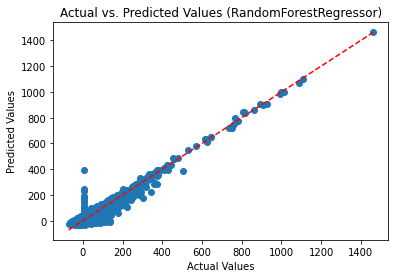

In [63]:
import matplotlib.pyplot as plt

# Plot the scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestRegressor)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()


### GradientBoostingRegressor

In [107]:
data.shape

(7394404, 25)

In [64]:
data4=data
data4 = data4.sample(n=200000, random_state=4)


In [65]:
data4

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,...,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Carrier,FINAL_DELAY,HOUR,DISTANCE_INTERVALS,GAIN,INTERVAL
427396,2019-03-10,AA,LGA,ORD,1849.0,19.0,2053.0,34.0,733.0,6,...,6.8,10.2,1.9,7.6,American Airlines Inc.,53.0,1800,700,-15.0,night
7235838,2019-07-12,YX,MSY,DCA,1042.0,-6.0,1417.0,-12.0,969.0,4,...,-2.4,-3.6,-0.6,-2.4,Republic Airline,-18.0,1000,900,6.0,morning
147427,2019-08-02,9E,GSP,LGA,1751.0,36.0,1959.0,40.0,610.0,4,...,8.0,12.0,3.6,14.4,Endeavor Air Inc.,76.0,1700,600,-4.0,afternoon
1156248,2019-12-15,AA,ORD,EWR,2045.0,-5.0,2335.0,-19.0,719.0,6,...,-3.8,-5.7,-0.5,-2.0,American Airlines Inc.,-24.0,2000,700,14.0,night
3936580,2019-09-09,OH,CHS,DCA,1940.0,-11.0,2118.0,-6.0,444.0,0,...,-1.2,-1.8,-1.1,-4.4,PSA Airlines Inc.,-17.0,1900,400,-5.0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244411,2019-04-11,OO,DFW,LAW,1325.0,-4.0,1411.0,-13.0,140.0,3,...,-2.6,-3.9,-0.4,-1.6,SkyWest Airlines Inc.,-17.0,1300,100,9.0,afternoon
5923531,2019-04-30,WN,OAK,BNA,1447.0,17.0,2109.0,29.0,1959.0,1,...,5.8,8.7,1.7,6.8,Southwest Airlines Co.,46.0,1400,1900,-12.0,afternoon
6839978,2019-12-31,WN,HOU,PNS,1548.0,63.0,1657.0,42.0,488.0,1,...,8.4,12.6,6.3,25.2,Southwest Airlines Co.,105.0,1500,400,21.0,afternoon
3579072,2019-03-31,NK,MSY,FLL,1934.0,-5.0,2213.0,-16.0,674.0,6,...,-3.2,-4.8,-0.5,-2.0,Spirit Air Lines,-21.0,1900,600,11.0,night


In [66]:
X3 = data4.drop(['ARR_DELAY','FL_DATE','CARRIER_DELAY','WEATHER_DELAY',
                 'SECURITY_DELAY','LATE_AIRCRAFT_DELAY'
               ,'FINAL_DELAY','GAIN'],axis=1)
Y3= data4['ARR_DELAY']

In [67]:
# Transform categorical variables into numerical representations. 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ORIGIN', 'DEST', 'Carrier','OP_UNIQUE_CARRIER','INTERVAL']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X3[col] = label_encoder.fit_transform(X3[col])


In [68]:
X3

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
427396,1,196,246,1849.0,19.0,2053.0,733.0,6,10,3,2019,2,1800,700,3
7235838,16,233,91,1042.0,-6.0,1417.0,969.0,4,12,7,2019,12,1000,900,2
147427,0,141,196,1751.0,36.0,1959.0,610.0,4,2,8,2019,4,1700,600,0
1156248,1,246,114,2045.0,-5.0,2335.0,719.0,6,15,12,2019,2,2000,700,3
3936580,11,67,91,1940.0,-11.0,2118.0,444.0,0,9,9,2019,11,1900,400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244411,12,94,186,1325.0,-4.0,1411.0,140.0,3,11,4,2019,13,1300,100,0
5923531,14,238,43,1447.0,17.0,2109.0,1959.0,1,30,4,2019,14,1400,1900,0
6839978,14,153,269,1548.0,63.0,1657.0,488.0,1,31,12,2019,14,1500,400,0
3579072,10,233,122,1934.0,-5.0,2213.0,674.0,6,31,3,2019,15,1900,600,3


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=4)

# Create the GradientBoostingRegressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=4)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.319287839939136


In [70]:
from sklearn.metrics import r2_score

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9239806934140836


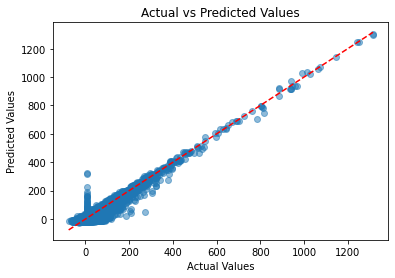

In [71]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

### DecisionTreeRegressor

In [81]:
data.shape

(7394404, 23)

In [82]:
from sklearn.tree import DecisionTreeRegressor


In [83]:
data5=data
data5 = data5.sample(n=1000000, random_state=4)


In [84]:
X4 = data5.drop(['ARR_DELAY','FL_DATE','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'
               ,'FINAL_DELAY','GAIN'],axis=1)
Y4= data5['ARR_DELAY']

In [85]:
# Transform categorical variables into numerical representations. 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ORIGIN', 'DEST', 'Carrier','OP_UNIQUE_CARRIER','INTERVAL']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X4[col] = label_encoder.fit_transform(X4[col])


In [86]:
X4

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,DISTANCE,WDAY,DAY,MONTH,YEAR,Carrier,HOUR,DISTANCE_INTERVALS,INTERVAL
427396,1,197,247,1849.0,19.0,2053.0,733.0,6,10,3,2019,2,1800,700,3
7235838,16,234,92,1042.0,-6.0,1417.0,969.0,4,12,7,2019,12,1000,900,2
147427,0,141,197,1751.0,36.0,1959.0,610.0,4,2,8,2019,4,1700,600,0
1156248,1,247,115,2045.0,-5.0,2335.0,719.0,6,15,12,2019,2,2000,700,3
3936580,11,67,92,1940.0,-11.0,2118.0,444.0,0,9,9,2019,11,1900,400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333357,1,94,309,1938.0,53.0,2130.0,1464.0,4,1,2,2019,2,1900,1400,3
740494,1,247,262,453.0,-7.0,625.0,1440.0,1,9,7,2019,2,400,1400,1
4079648,12,109,93,1226.0,-9.0,1423.0,563.0,6,27,1,2019,13,1200,500,0
6021505,14,234,58,908.0,-2.0,1231.0,998.0,6,26,5,2019,14,900,900,2


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=10,random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.469418525135097


In [90]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Decision Tree): {r2}")

R-squared (Decision Tree): 0.9165580204878874


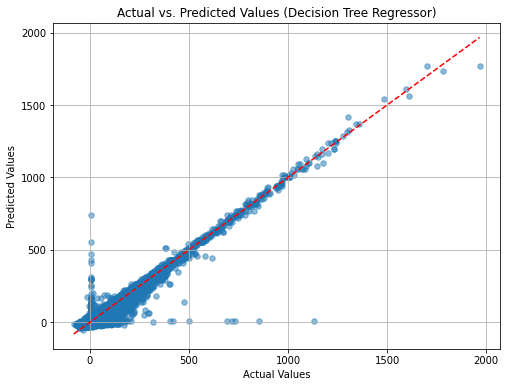

In [91]:
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred_dt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=30, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree Regressor)')
plt.grid(True)

# Plot a diagonal line (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()
